In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
import math 
from matplotlib import cm

https://www.thorlabs.de/newgrouppage9.cfm?objectgroup_id=7176 AL1255 model

In [3]:
range_x_large = np.linspace(-10* mm, 10* mm, 1024 * 4)
range_z_large = np.linspace(-10* mm , 50* mm,1024 * 4)

wavelength = 5.532 * um

a4= 1.8429898 * 10** -15
a6= -3.8172252 * 10** -24
a8= -2.4345457 * 10**-32 

k = -0.6
R=12.78 
depth = 4
size= 12.5

In [25]:
u0 = Scalar_source_X(range_x_large, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

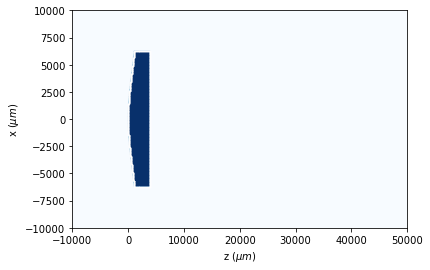

In [26]:
lens = Scalar_mask_XZ(range_x_large, range_z_large, wavelength, n_background= 1)
lens_ratio = 1
lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refraction_index=1.517,
                                  cx=( 1 / (R/lens_ratio*mm), 0),
                                  Qx=(k,0),
                                  a2=( a4, 0),
                                  a3=(a6,0),
                                  a4=(a8 , 0),
                                  depth= depth/lens_ratio* mm,
                                  size= size/lens_ratio* mm)




lens.draw_refraction_index(draw_borders=True)

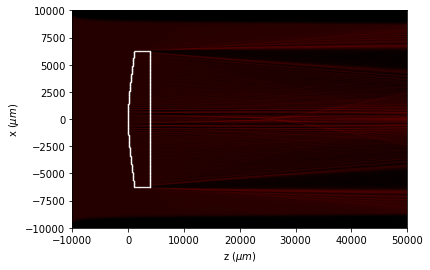

In [27]:
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)

lens.draw(kind='intensity',
              logarithm=False,
          draw_borders=True,
          )

In [28]:
x_focus, z_focus = lens.search_focus()

x = 2.442 um, z = 25589.744 um


# Miniature

In [14]:
range_x_min = np.linspace(-30* um, 30* um, 3*1024 * 4)
range_z_min = np.linspace(-10* um , 50* um,1024 * 4)



lens_ratio = 2100
wavelength_min = 0.532 * um


In [15]:
u0_min = Scalar_source_X(range_x_min, wavelength_min)
u0_min.plane_wave(A=1, theta=0 * degrees)

<string>:1: RuntimeWarning: invalid value encountered in sqrt


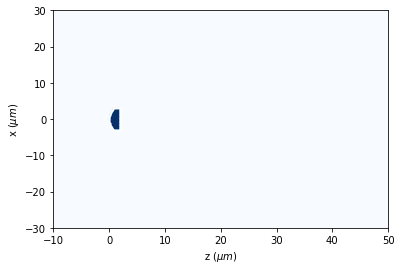

In [16]:
lens_min = Scalar_mask_XZ(range_x_min, range_z_min, wavelength_min, n_background= 1)

lens_min.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refraction_index=1.517,
                                  cx=( 1 / (R/lens_ratio*mm), 0),
                                  Qx=(k,0),
                                  a2=( a4*lens_ratio**3, 0),
                                  a3=(a6*lens_ratio**5,0),
                                  a4=(a8*lens_ratio**7 , 0),
                                  depth= depth/lens_ratio* mm,
                                  size= size/lens_ratio* mm)




lens_min.draw_refraction_index(draw_borders=True)

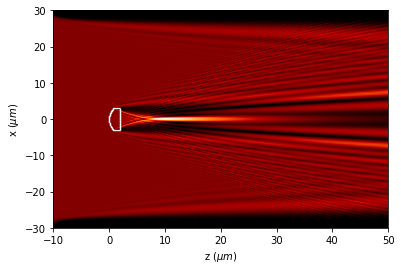

In [17]:
lens_min.incident_field(u0_min)
lens_min.clear_field()
lens_min.BPM(verbose=False)

lens_min.draw(kind='intensity',
              logarithm=True,
          draw_borders=True,
          )

In [18]:
x_focus_min, z_focus_min = lens_min.search_focus()

x = 0.002 um, z = 9.839 um


In [43]:
x_focus_min, z_focus_min = lens_min.search_focus()

x = 0.002 um, z = 10.190 um


In [38]:
x_focus_min, z_focus_min = lens_min.search_focus()

x = 0.002 um, z = 24.696 um


In [49]:
x_focus_min, z_focus_min = lens_min.search_focus()

x = 0.002 um, z = 10.923 um


In [7]:
#https://www.thorlabs.de/newgrouppage9.cfm?objectgroup_id=7176